# MET DATA ANALYSIS
#### Reid Holben and Gabriel Barela

#### Loading the dataset from GitHub using pandas.
* Imports the pandas library: 
    * This is essential for data manipulation and analysis in Python.
* Defines the URL: 
    * This is the link to the raw dataset hosted on GitHub.
* Loads the dataset: 
    * The pd.read_csv(url) function reads the CSV file from the provided URL and loads it into a pandas DataFrame called data.

In [1]:
# ! pip install -r requirements.txt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
# URL of the raw dataset on GitHub
url = 'https://github.com/metmuseum/openaccess/raw/refs/heads/master/MetObjects.csv'

# Load the dataset
data = pd.read_csv(url)

#Data Descriptive Statistics - Very little in way of numerical columns
#Metadata information from the Met is lacking, last update was June 17th 2023 but there is little else to go off of
print(data.describe())

C:\Users\gbare\AppData\Local\Temp\ipykernel_14124\3371701879.py:5: DtypeWarning: Columns (5,7,10,11,12,13,14,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url)


           Object ID  Object Begin Date  Object End Date  Metadata Date
count  484956.000000      484956.000000    484956.000000            0.0
mean   394499.940353        1303.913734      1402.978142            NaN
std    242732.561637        1710.259182      1132.101347            NaN
min         1.000000     -400000.000000   -240000.000000            NaN
25%    212379.750000        1535.000000      1593.000000            NaN
50%    374771.500000        1800.000000      1840.000000            NaN
75%    570971.250000        1891.000000      1905.000000            NaN
max    900748.000000        5000.000000      2870.000000            NaN


In [3]:
# Print the shape of the DataFrame
data.shape

(484956, 54)

#### Analyze Missing Data in the DataFrame and Combine it with the Data Types of Each Feature

This code snippet analyzes the missing data in the DataFrame and combines it with the data types of each feature. It performs the following steps:

1. **Calculate Missing Data**:
   - `nullCounts = data.isnull().sum()`: Counts the number of missing values for each feature.
   - `totalInstances = len(data)`: Gets the total number of instances in the DataFrame.
   - `nullPercentages = (nullCounts / totalInstances) * 100`: Calculates the percentage of missing values for each feature.

2. **Create a List of Tuples**:
   - A loop iterates over the features, counts, and percentages, appending them to `nullData` as tuples.

3. **Create a DataFrame for Missing Data**:
   - `nullDataFrame = pd.DataFrame(nullData, columns=['Feature', 'Count', 'Percentage'])`: Converts the list of tuples into a DataFrame.
   - `nullDataFrame = nullDataFrame.sort_values(by='Percentage', ascending=False)`: Sorts the DataFrame by the percentage of missing values in descending order.

4. **Get Data Types**:
   - `data_types = data.dtypes`: Gets the data types of each feature.
   - `data_types_df = data_types.reset_index()`: Converts the Series to a DataFrame.
   - `data_types_df.columns = ['Feature', 'Data Type']`: Renames the columns for readability.

5. **Merge DataFrames**:
   - `combined_df = pd.merge(nullDataFrame, data_types_df, on='Feature')`: Merges the missing data DataFrame with the data types DataFrame on the 'Feature' column.

Finally, `combined_df` will contain the features, their missing value counts, percentages, and data types.

In [4]:
nullData = []
nullCounts = data.isnull().sum()
totalInstances = len(data)
nullPercentages = (nullCounts / totalInstances) * 100

for feature, count, percentage in zip(nullCounts.index, nullCounts, nullPercentages):
    nullData.append((feature, count, round(percentage, 2)))

nullDataFrame = pd.DataFrame(nullData, columns=['Feature', 'Count', 'Percentage'])

# Sort the DataFrame by 'Percentage' in decending order
nullDataFrame = nullDataFrame.sort_values(by='Percentage', ascending=False)

# Get the data types of each feature in the DataFrame
data_types = data.dtypes

# Convert the data types to a DataFrame for better readability
data_types_df = data_types.reset_index()
data_types_df.columns = ['Feature', 'Data Type']

# Merge the null data and data types into a single DataFrame
combined_df = pd.merge(nullDataFrame, data_types_df, on='Feature')

combined_df

,Feature,Count,Percentage,Data Type
0,Metadata Date,484956,100.00,float64
1,River,482864,99.57,object
2,State,482335,99.46,object
3,Locus,477438,98.45,object
4,County,476397,98.24,object
5,Reign,473720,97.68,object
6,Locale,469217,96.75,object
7,Excavation,468385,96.58,object
8,Subregion,462813,95.43,object
9,Dynasty,461755,95.22,object


#### Data Cleaning Script

This script cleans the dataset by removing rows with NaN values in the 'AccessionYear' column and filtering out empty strings and zeros.

In [5]:
# Alternatively, you can use dropna for NaN values and filter for empty strings and zeros
data = data.dropna(subset=['AccessionYear'])
data = data[(data['AccessionYear'] != '') & (data['AccessionYear'] != 0)]
data.shape

(481094, 54)

#### Explanation of Code for Data Preparation

This code snippet is used to prepare the dataset for analysis of accession and object dates. It performs the following steps:

1. **List of Features to Keep**: 
   - A list named `features_to_keep` is created, containing the names of the columns that are relevant for the analysis. These columns include:
     - `AccessionYear`
     - `Object Begin Date`
     - `Object End Date`
     - `Department`
     - `Artist Begin Date`
     - `Artist End Date`
     - `Dimensions`
     - `Object Date`

2. **Drop Irrelevant Features**:
   - The dataset `data` is filtered to keep only the columns specified in `features_to_keep`. The resulting DataFrame is stored in `cleaned_data`.

3. **Convert 'AccessionYear' to Numeric**:
   - The `AccessionYear` column in `cleaned_data` is converted to numeric values using `pd.to_numeric`. Any errors encountered during the conversion are coerced to `NaN`.

4. **Drop Rows with NaN 'AccessionYear'**:
   - Rows where the `AccessionYear` is `NaN` are dropped from `cleaned_data`.

5. **Display the First Few Rows**:
   - The `head()` method is called on `cleaned_data` to display the first few rows of the DataFrame, allowing for a quick inspection of the data.

This code ensures that only relevant features are retained for further analysis and that the `AccessionYear` column is properly converted to numeric values.

In [6]:
# List of features to keep for analysis of accession and object dates
features_to_keep = ['AccessionYear', 'Object Begin Date', 'Object End Date', 'Department', 'Artist Begin Date', 'Artist End Date', 'Dimensions','Object Date']

# Drop irrelevant features
cleaned_data = data[features_to_keep]

# Convert 'AccessionYear' to numeric, coercing errors to NaN
cleaned_data.loc[:, 'AccessionYear'] = pd.to_numeric(cleaned_data['AccessionYear'], errors='coerce')

# Drop rows where 'AccessionYear' is NaN after the conversion
cleaned_data = cleaned_data.dropna(subset=['AccessionYear'])

cleaned_data.head()

,AccessionYear,Object Begin Date,Object End Date,Department,Artist Begin Date,Artist End Date,Dimensions,Object Date
0,1979.0,1853,1853,The American Wing,1794,1869,Dimensions unavailable,1853
1,1980.0,1901,1901,The American Wing,1785,1844,Dimensions unavailable,1901
2,1967.0,1909,1927,The American Wing,NaN,NaN,Diam. 11/16 in. (1.7 cm),1909–27
3,1967.0,1909,1927,The American Wing,NaN,NaN,Diam. 11/16 in. (1.7 cm),1909–27
4,1967.0,1909,1927,The American Wing,NaN,NaN,Diam. 11/16 in. (1.7 cm),1909–27


In [7]:
# Display the dimensions of the cleaned dataset
cleaned_data.shape

(481054, 8)

#### Plotting the Distribution of Accession Dates by Department

To visualize the distribution of accession dates across different departments.

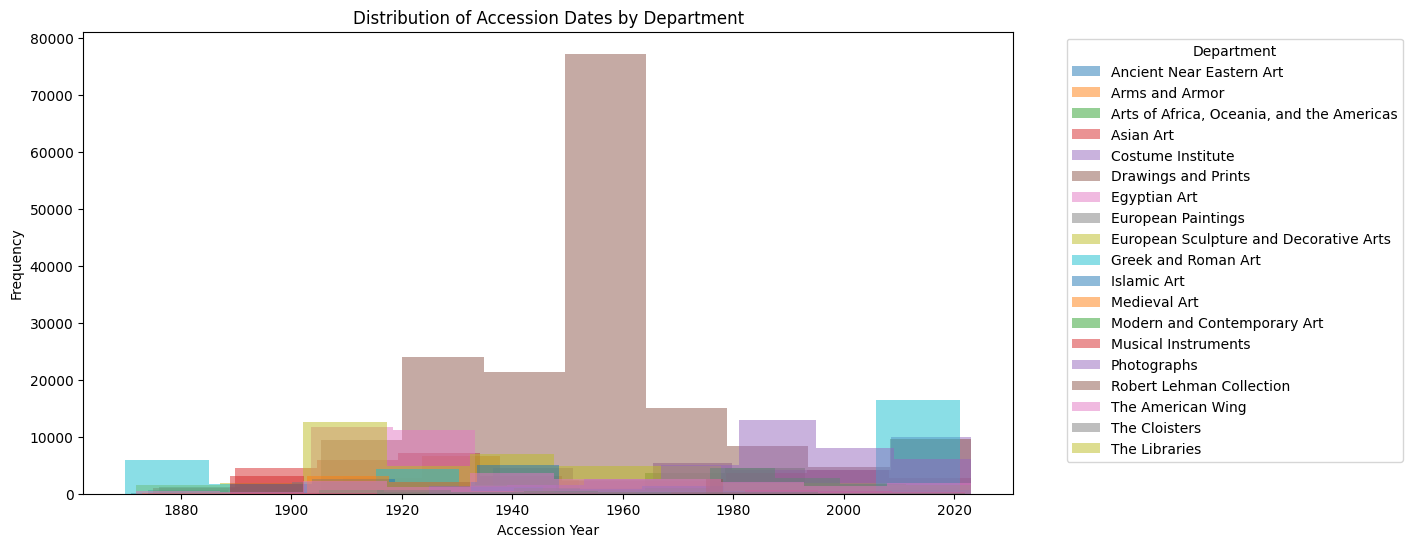

In [8]:
# Create a Figure
plt.figure(figsize=(12, 6))

# Group and Plot Data
cleaned_data.groupby('Department')['AccessionYear'].plot(kind='hist', alpha=0.5, legend=True)

# Add Titles and Labels
plt.title('Distribution of Accession Dates by Department')
plt.xlabel('Accession Year')
plt.ylabel('Frequency')

# Add a Legend
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the Plot
plt.show()

#### Plotting the Distribution of Object Begin Dates by Department

To visualize the distribution of object begin dates across different departments.

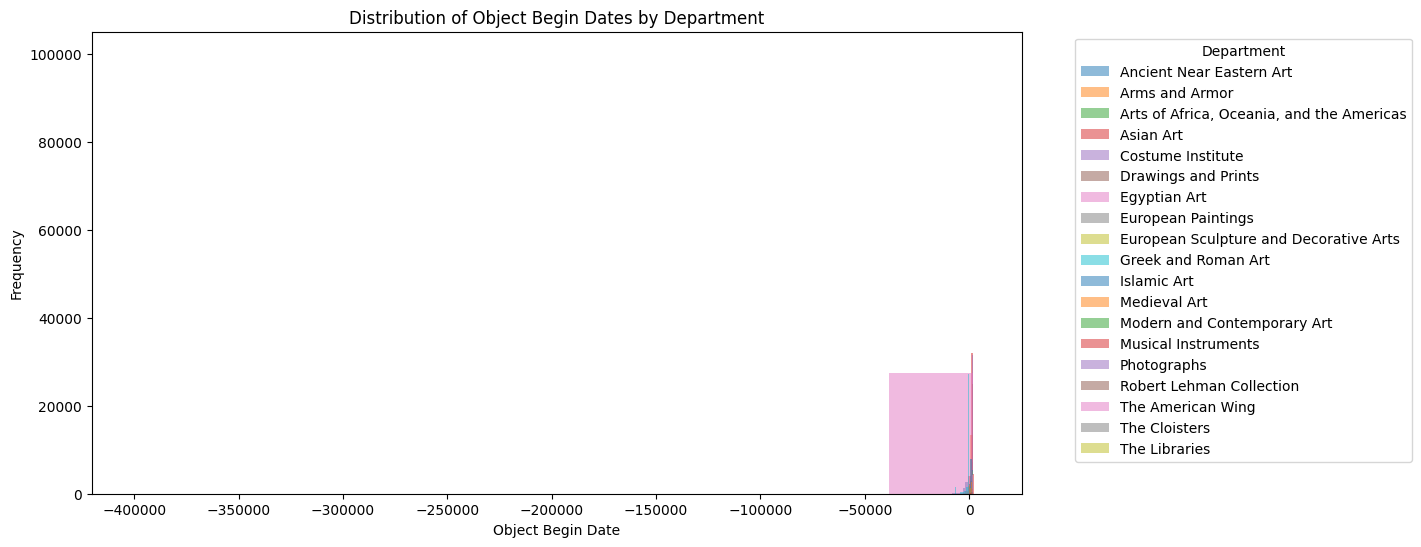

In [9]:
# Plot the distribution of object begin dates by department
plt.figure(figsize=(12, 6))
cleaned_data.groupby('Department')['Object Begin Date'].plot(kind='hist', alpha=0.5, legend=True)

# Add Titles and Labels
plt.title('Distribution of Object Begin Dates by Department')
plt.xlabel('Object Begin Date')
plt.ylabel('Frequency')

# Add a Legend
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the Plot
plt.show()

#### Plotting the Distribution of Object End Dates by Department

To visualize the distribution of object end dates across different departments.

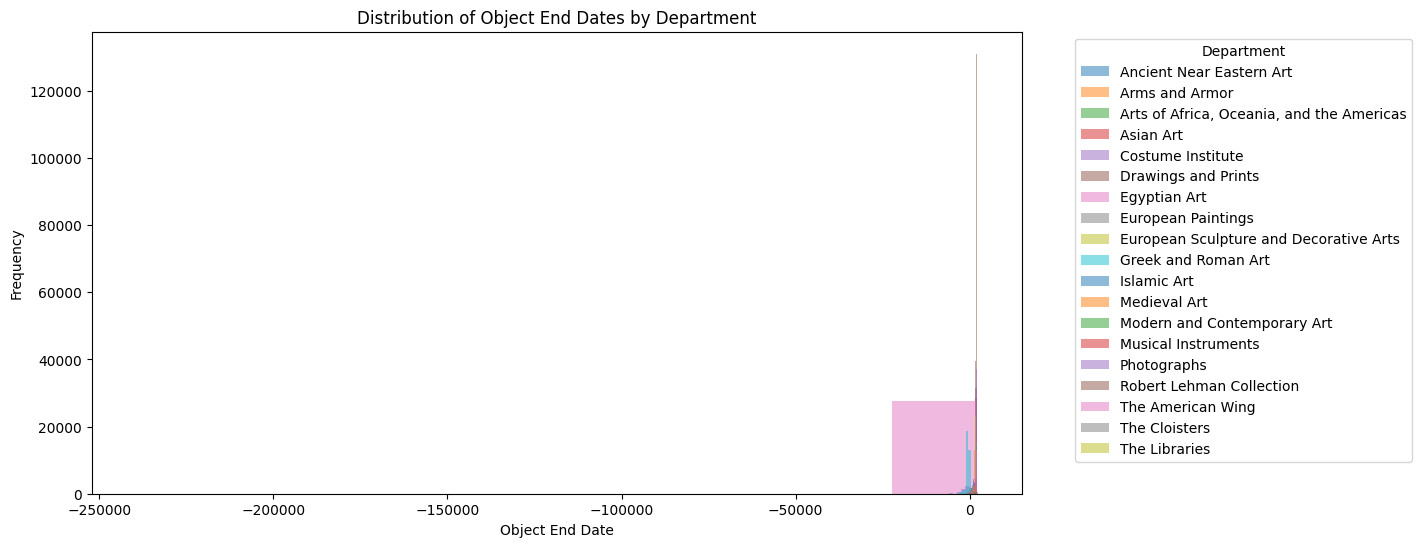

In [10]:
# Plot the distribution of object end dates by department
plt.figure(figsize=(12, 6))
cleaned_data.groupby('Department')['Object End Date'].plot(kind='hist', alpha=0.5, legend=True)

# Add Titles and Labels
plt.title('Distribution of Object End Dates by Department')
plt.xlabel('Object End Date')
plt.ylabel('Frequency')

# Add a Legend
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the Plot
plt.show()

#### Explanation of Code for Anomaly Detection

This code snippet is used to detect anomalies in the dataset using the Isolation Forest algorithm. It performs the following steps:

1. **Import Libraries**:
   - `pandas` for data manipulation.
   - `IsolationForest` from `sklearn.ensemble` for anomaly detection.

2. **Convert Categorical Data to Numerical Data**:
   - The `Department` column in `cleaned_data` is converted to numerical data using one-hot encoding with `pd.get_dummies`.

3. **Ensure All Columns are Numeric**:
   - A loop iterates through all columns in `cleaned_data`, converting each column to numeric values using `pd.to_numeric`. Any errors encountered during the conversion are coerced to `NaN`.

4. **Save Version Pre One-Hot Encoding**:
   - A copy of `cleaned_data` before one-hot encoding is saved in `cleaned_data_no_one`.

5. **Initialize the Isolation Forest Model**:
   - An Isolation Forest model is initialized with a contamination rate of 0.01 and a random state of 42 for reproducibility.

6. **Fit the Model to the Data**:
   - The Isolation Forest model is fitted to `cleaned_data`.

7. **Predict Anomalies**:
   - The model predicts anomalies in the dataset, where 1 indicates normal data and -1 indicates an anomaly.

8. **Add the Anomaly Column to the DataFrame**:
   - The anomaly predictions are added as a new column named `Anomaly` in `cleaned_data`.

9. **Display the Rows that are Considered Anomalies**:
   - A new DataFrame `anomalies_df` is created, containing only the rows where the `Anomaly` column is -1.

10. **Print the Anomalies DataFrame**:
    - The first few rows of `anomalies_df` are displayed using the `head()` method.

This code ensures that categorical data is properly encoded, all columns are numeric, and anomalies in the dataset are detected using the Isolation Forest algorithm.

In [11]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import re

# Convert categorical data to numerical data using one-hot encoding
cleaned_data = pd.get_dummies(cleaned_data, columns=['Department'])

# Ensure all columns are numeric
for column in cleaned_data.columns:
    cleaned_data[column] = pd.to_numeric(cleaned_data[column], errors='coerce')

# Save version pre one hot encoding
cleaned_data_no_one = cleaned_data.copy()

# Initialize the Isolation Forest model
model = IsolationForest(contamination=0.01, random_state=42)

# Fit the model to the data
model.fit(cleaned_data)

# Predict anomalies (1 for normal, -1 for anomaly)
anomalies = model.predict(cleaned_data)

# Add the anomaly column to the DataFrame
cleaned_data['Anomaly'] = anomalies

# Display the rows that are considered anomalies
anomalies_df = cleaned_data[cleaned_data['Anomaly'] == -1]

# Print the anomalies DataFrame
anomalies_df.head()

,AccessionYear,Object Begin Date,Object End Date,Artist Begin Date,Artist End Date,Dimensions,Object Date,Department_Ancient Near Eastern Art,Department_Arms and Armor,"Department_Arts of Africa, Oceania, and the Americas",...,Department_Islamic Art,Department_Medieval Art,Department_Modern and Contemporary Art,Department_Musical Instruments,Department_Photographs,Department_Robert Lehman Collection,Department_The American Wing,Department_The Cloisters,Department_The Libraries,Anomaly
17585,1912.0,-12500,-300,NaN,NaN,NaN,NaN,False,True,False,...,False,False,False,False,False,False,False,False,False,-1
17586,1912.0,-12500,-300,NaN,NaN,NaN,NaN,False,True,False,...,False,False,False,False,False,False,False,False,False,-1
20953,1908.0,-10025,-4975,NaN,NaN,NaN,NaN,False,True,False,...,False,False,False,False,False,False,False,False,False,-1
20954,1908.0,-5000,-2000,NaN,NaN,NaN,NaN,False,True,False,...,False,False,False,False,False,False,False,False,False,-1
20956,1908.0,-5000,-2000,NaN,NaN,NaN,NaN,False,True,False,...,False,False,False,False,False,False,False,False,False,-1


#### Counting and Printing the Number of Anomalies

To count and print the number of anomalies detected by the Isolation Forest model, we can use the following steps:

In [12]:
# Count the number of anomalies
anomaly_count = cleaned_data['Anomaly'].value_counts()

# Print the count of anomalies
print(anomaly_count)

Anomaly
 1    476557
-1      4497
Name: count, dtype: int64


#### Plotting the Count of Anomalies

To visualize the count of anomalies detected by the Isolation Forest model, we can use the following steps:

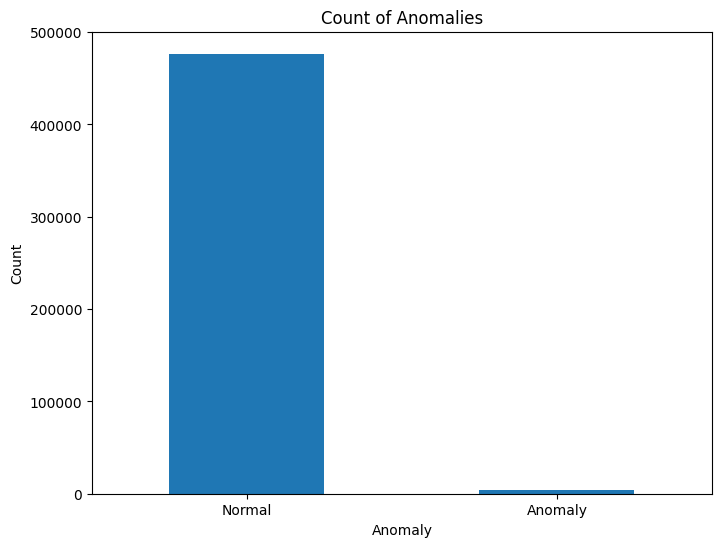

In [13]:
# Plot the count of anomalies
plt.figure(figsize=(8, 6))
anomaly_count.plot(kind='bar')

# Add Titles and Labels
plt.title('Count of Anomalies')
plt.xlabel('Anomaly')
plt.ylabel('Count')

# Customize X-axis Labels
plt.xticks(ticks=[0, 1], labels=['Normal', 'Anomaly'], rotation=0)

# Display the Plot
plt.show()

#### Plotting Anomalies in a Scatter Plot with Different Colors

To visualize anomalies in a scatter plot with different colors, we can use the following steps:

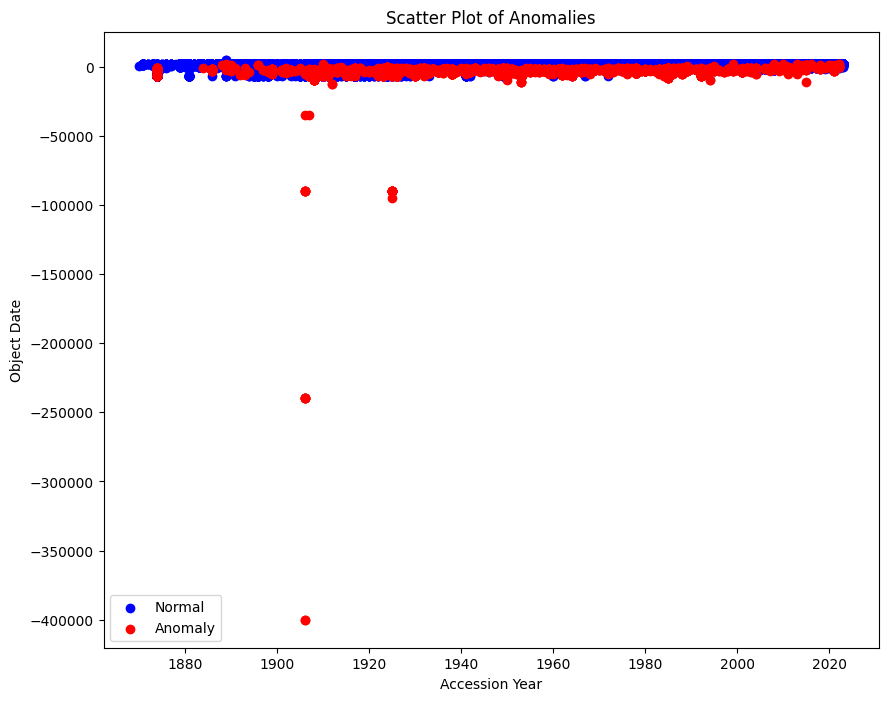

In [14]:
# Plot anomalies in a scatter plot with different colors
plt.figure(figsize=(10, 8))

# Plot normal data points
plt.scatter(cleaned_data[cleaned_data['Anomaly'] == 1]['AccessionYear'],
            cleaned_data[cleaned_data['Anomaly'] == 1]['Object Begin Date'],
            c='blue', label='Normal')

# Plot anomalous data points
plt.scatter(cleaned_data[cleaned_data['Anomaly'] == -1]['AccessionYear'],
            cleaned_data[cleaned_data['Anomaly'] == -1]['Object Begin Date'],
            c='red', label='Anomaly')

plt.title('Scatter Plot of Anomalies')
plt.xlabel('Accession Year')
plt.ylabel('Object Date')
plt.legend()
plt.show()

#### Removing Anomalies and Plotting the New Graph

This script removes anomalies from the dataset and plots a scatter plot without these anomalies. The following steps outline the process:

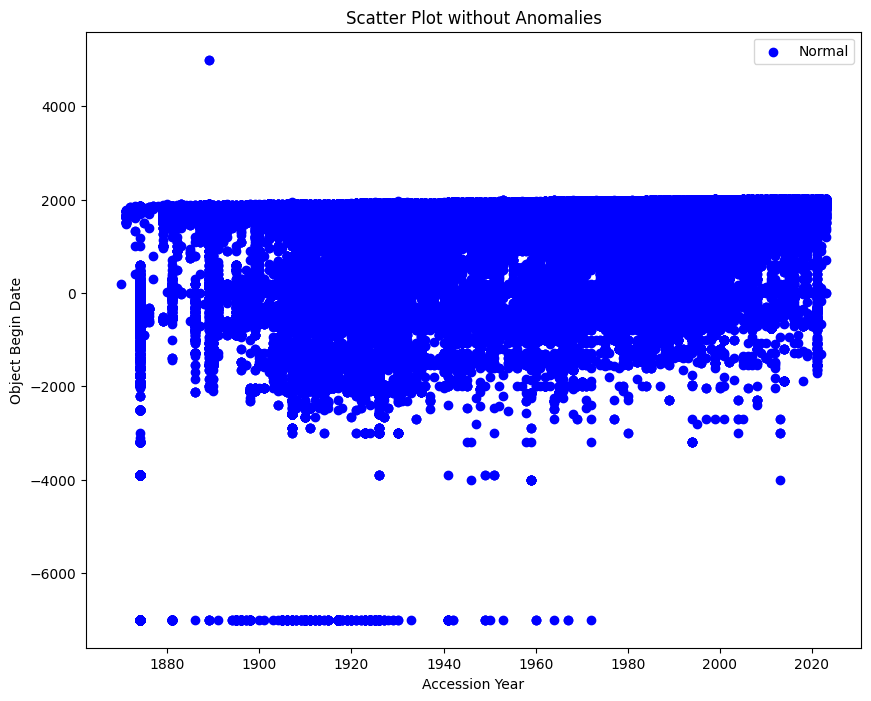

In [15]:
# Remove anomalies from the dataset
cleaned_data_no_anomalies = cleaned_data[cleaned_data['Anomaly'] == 1]

# Plot the new graph without anomalies
plt.figure(figsize=(10, 8))

# Plot normal data points without anomalies
plt.scatter(cleaned_data_no_anomalies['AccessionYear'],
            cleaned_data_no_anomalies['Object Begin Date'],
            c='blue', label='Normal')

plt.title('Scatter Plot without Anomalies')
plt.xlabel('Accession Year')
plt.ylabel('Object Begin Date')
plt.legend()
plt.show()

#### Explanation of Code for Filtering Outliers

This code snippet filters rows in the dataset where the 'Object Begin Date' is greater than or equal to the 'AccessionYear'. It performs the following steps:

1. **Filter Rows Based on Condition**:
   - The dataset `cleaned_data` is filtered to keep only the rows where the 'Object Begin Date' is greater than or equal to the 'AccessionYear'. The resulting DataFrame is stored in `outlier_rows_positive`.

2. **Display the Shape of the Filtered DataFrame**:
   - The `shape` attribute of `outlier_rows_positive` is used to display the dimensions of the filtered DataFrame, showing the number of rows and columns that meet the condition.

This code helps identify and analyze rows where the 'Object Begin Date' is not earlier than the 'AccessionYear', which could be considered outliers or data entry errors.

In [16]:
# Filter rows where 'AccessionYear' is NaN
outlier_rows_positive = cleaned_data[cleaned_data['Object Begin Date']>=cleaned_data['AccessionYear']]
outlier_rows_positive.shape

(3164, 27)

#### Explanation of Code for Filtering Extreme Outliers

This code snippet filters rows in the dataset where the 'Object Begin Date' is less than or equal to -6000. It performs the following steps:

1. **Filter Rows Based on Condition**:
   - The dataset `cleaned_data` is filtered to keep only the rows where the 'Object Begin Date' is less than or equal to -6000. The resulting DataFrame is stored in `outlier_rows_negative`.

2. **Display the Shape of the Filtered DataFrame**:
   - The `shape` attribute of `outlier_rows_negative` is used to display the dimensions of the filtered DataFrame, showing the number of rows and columns that meet the condition.

This code helps identify and analyze rows with extremely early 'Object Begin Date' values, which could be considered extreme outliers or data entry errors.

In [17]:
# Filter rows where 'AccessionYear' is NaN
outlier_rows_negative = cleaned_data[cleaned_data['Object Begin Date']<=-6000]
outlier_rows_negative.shape

(1689, 27)

#### Explanation of Code for Filtering Valid Date Ranges

This code snippet filters rows in the dataset to ensure that the 'Object Begin Date' falls within a valid range. It performs the following steps:

1. **Filter Rows with 'Object Begin Date' Less Than or Equal to 2025**:
   - The dataset `cleaned_data` is filtered to keep only the rows where the 'Object Begin Date' is less than or equal to 2025.

2. **Filter Rows with 'Object Begin Date' Greater Than or Equal to -5000**:
   - The dataset `cleaned_data` is further filtered to keep only the rows where the 'Object Begin Date' is greater than or equal to -5000.

These filters ensure that the 'Object Begin Date' values fall within a reasonable historical range, removing any dates that are too far in the future or too far in the past.

In [18]:
# Filter rows with 'Object Begin Date' within a valid range
cleaned_data = cleaned_data[cleaned_data['Object Begin Date'] <= 2025]
cleaned_data = cleaned_data[cleaned_data['Object Begin Date'] >= -5000]

# Display the dimensions of the cleaned dataset
cleaned_data.shape

(479332, 27)

#### Explanation of Code for Additional Outlier Removal and Scatter Plot

This code snippet removes anomalies from the dataset and plots a scatter plot without the additonal outliers. It performs the following steps:

1. **Remove Additonal Anomalies from the Dataset**:
   - The dataset `cleaned_data` only has the identified time range identified from the previous graph review.

2. **Plot the New Graph without Anomalies**:
   - A scatter plot is created to visualize the data points without the additional ouliers.

3. **Plot Normal Data Points without Anomalies**:
   - The `plt.scatter` function is used to plot the 'AccessionYear' against the 'Object Begin Date' for the normal data points (without outliers). The points are colored blue and labeled as 'Normal'.

4. **Set Plot Title and Labels**:
   - The plot is given a title 'Scatter Plot without Anomalies'.
   - The x-axis is labeled 'Accession Year'.
   - The y-axis is labeled 'Object Begin Date'.

5. **Add Legend**:
   - A legend is added to the plot to indicate the normal data points.

6. **Display the Plot**:
   - The plot is displayed using `plt.show()`.

This code helps visualize the dataset after removing anomalies, providing a clearer view of the normal data points.

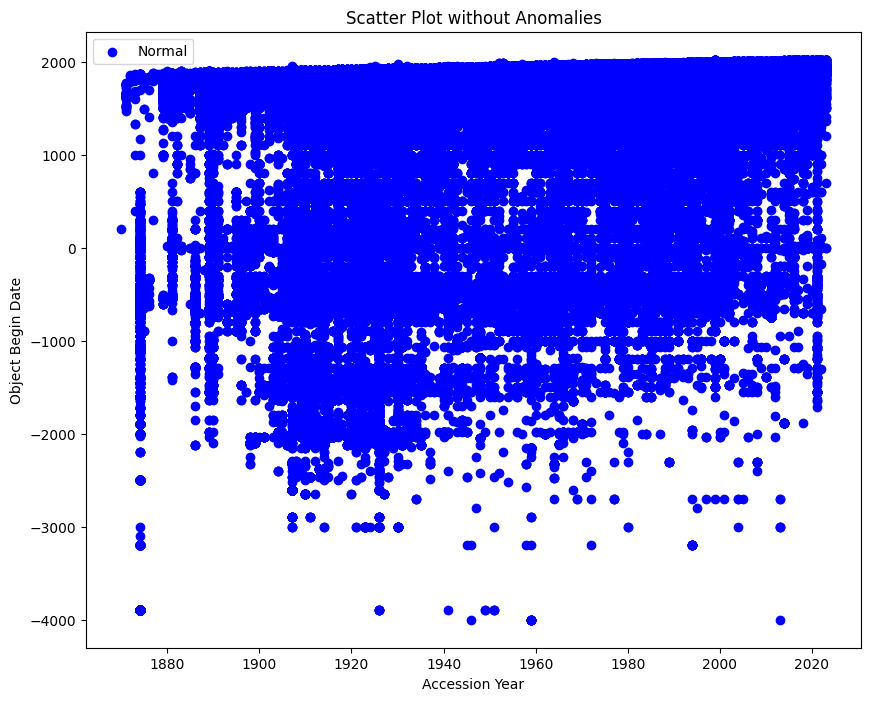

In [19]:
# Remove anomalies from the dataset
cleaned_data_no_anomalies = cleaned_data[cleaned_data['Anomaly'] == 1]

# Plot the new graph without anomalies
plt.figure(figsize=(10, 8))

# Plot normal data points without anomalies
plt.scatter(cleaned_data_no_anomalies['AccessionYear'],
            cleaned_data_no_anomalies['Object Begin Date'],
            c='blue', label='Normal')

# Set plot title and labels
plt.title('Scatter Plot without Anomalies')
plt.xlabel('Accession Year')
plt.ylabel('Object Begin Date')

# Add legend
plt.legend()

# Display the plot
plt.show()

#### Reversing One-Hot Encoding for the 'Department' Column

This script reverses the one-hot encoding for the 'Department' column and drops the one-hot encoded columns. The following steps outline the process:

In [20]:
# Identify one-hot encoded columns
department_columns = [col for col in cleaned_data_no_anomalies.columns if col.startswith('Department_')]

# Check if department_columns is not empty
if department_columns:
    # Reverse one-hot encoding for the 'Department' column
    cleaned_data_no_anomalies.loc[:, 'Department'] = cleaned_data_no_anomalies[department_columns].idxmax(axis=1)
    cleaned_data_no_anomalies.loc[:, 'Department'] = cleaned_data_no_anomalies['Department'].apply(lambda x: x.split('_')[1])

    # Drop the one-hot encoded columns
    cleaned_data_no_anomalies = cleaned_data_no_anomalies.drop(columns=department_columns)
else:
    print("No one-hot encoded columns found for 'Department_'")

# Same For Non-Anomaly Data
department_columns = [col for col in cleaned_data_no_one.columns if col.startswith('Department_')]

# Check if department_columns is not empty
if department_columns:
    # Reverse one-hot encoding for the 'Department' column
    cleaned_data_no_one.loc[:, 'Department'] = cleaned_data_no_one[department_columns].idxmax(axis=1)
    cleaned_data_no_one.loc[:, 'Department'] = cleaned_data_no_one['Department'].apply(lambda x: x.split('_')[1])

    # Drop the one-hot encoded columns
    cleaned_data_no_one = cleaned_data_no_one.drop(columns=department_columns)
else:
    print("No one-hot encoded columns found for 'Department_'")

C:\Users\gbare\AppData\Local\Temp\ipykernel_14124\896401195.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data_no_anomalies.loc[:, 'Department'] = cleaned_data_no_anomalies[department_columns].idxmax(axis=1)


#### Plotting Object Start Dates by Department with Color Indicating Accession Year

To visualize object start dates by department, with color indicating the accession year, we can use the following steps:

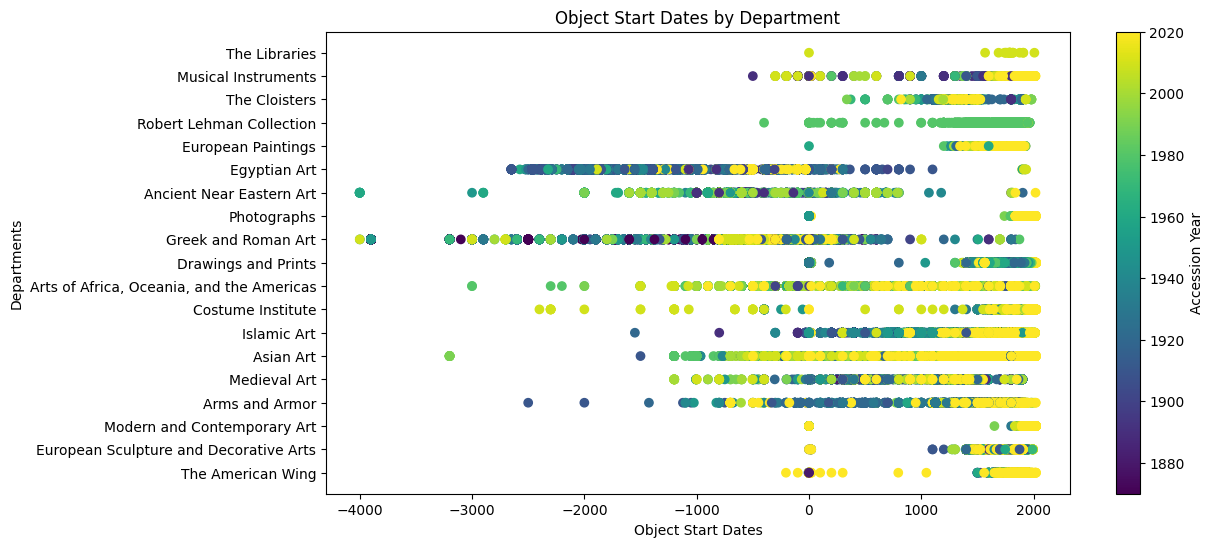

In [21]:
# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Create a scatter plot
# X-axis: Object Begin Date
# Y-axis: Department
# Color: Accession Year (rounded to the nearest decade)
# Colormap: viridis
plt.scatter(cleaned_data_no_anomalies['Object Begin Date'], cleaned_data_no_anomalies['Department'],
            c=round(cleaned_data_no_anomalies['AccessionYear'], -1), cmap='viridis')

# Add a colorbar to the plot
cbar = plt.colorbar()
cbar.set_label('Accession Year')  # Label for the colorbar

# Add a title to the plot
plt.title('Object Start Dates by Department')

# Label the Y-axis
plt.ylabel('Departments')

# Label the X-axis
plt.xlabel('Object Start Dates')

# Display the plot
plt.show()

#### Converting 'AccessionYear' to Numeric and Plotting Distribution by Department

This script converts the 'AccessionYear' column to numeric, handles any errors by coercing them to NaN, drops rows with NaN values, and plots the distribution of accession dates by department. The following steps outline the process:

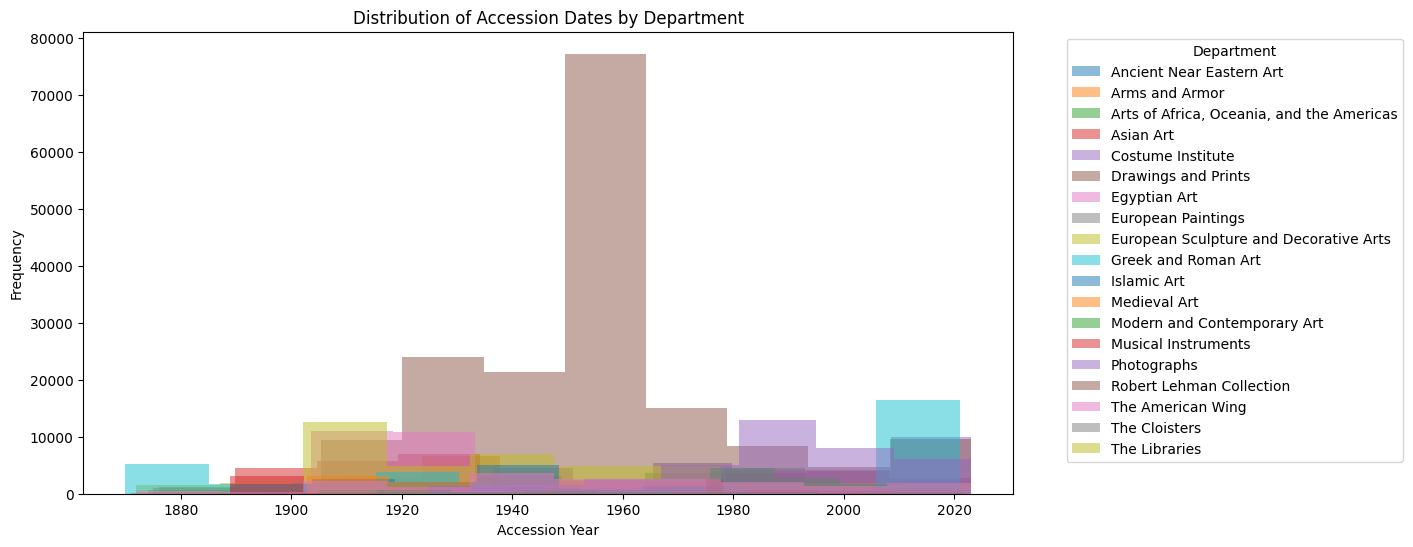

In [22]:
# Convert 'AccessionYear' to numeric, coercing errors to NaN
cleaned_data_no_anomalies.loc[:, 'AccessionYear'] = pd.to_numeric(cleaned_data_no_anomalies['AccessionYear'], errors='coerce')

# Drop rows with NaN values in 'AccessionYear'
cleaned_data_no_anomalies = cleaned_data_no_anomalies.dropna(subset=['AccessionYear'])

# Plot the distribution of accession dates by department
plt.figure(figsize=(12, 6))

# Group by 'Department' and plot the distribution of 'AccessionYear'
cleaned_data_no_anomalies.groupby('Department')['AccessionYear'].plot(kind='hist', alpha=0.5, legend=True)

# Add a title to the plot
plt.title('Distribution of Accession Dates by Department')

# Label the X-axis
plt.xlabel('Accession Year')

# Label the Y-axis
plt.ylabel('Frequency')

# Add a legend with the title 'Department'
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

#### Plotting the Distribution of Object Dates by Department

This script plots the distribution of object begin and end dates by department. The following steps outline the process:

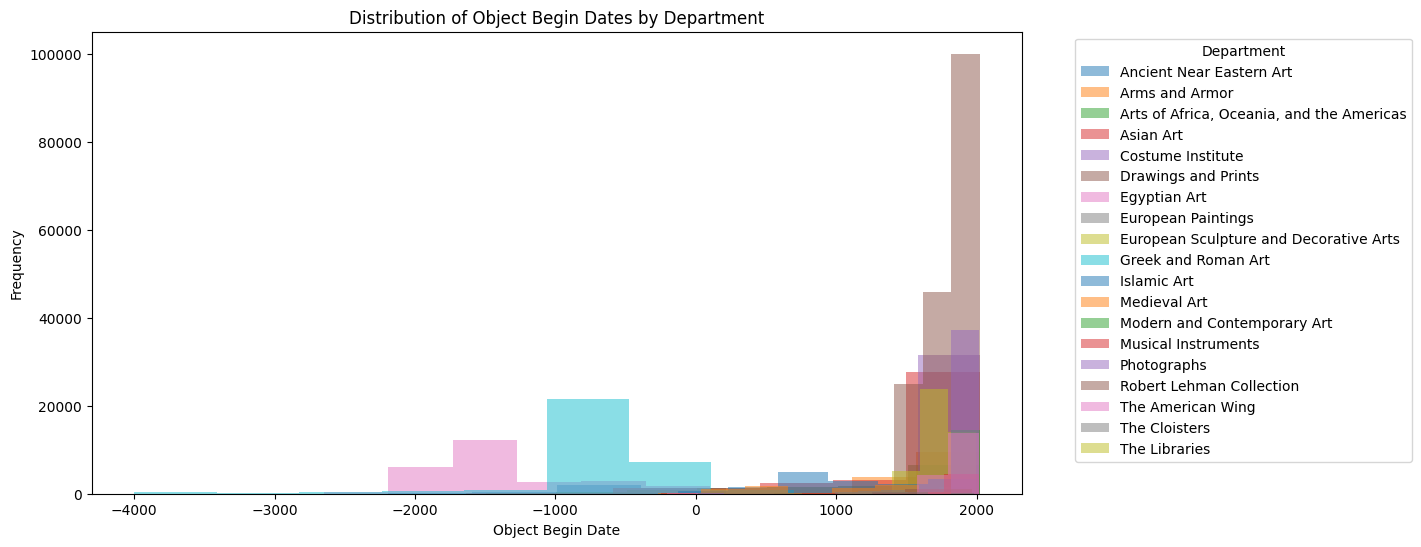

In [23]:
# Plot the distribution of object begin dates by department
plt.figure(figsize=(12, 6))

# Group by 'Department' and plot the distribution of 'Object Begin Date'
cleaned_data_no_anomalies.groupby('Department')['Object Begin Date'].plot(kind='hist', alpha=0.5, legend=True)

# Add a title to the plot
plt.title('Distribution of Object Begin Dates by Department')

# Label the X-axis
plt.xlabel('Object Begin Date')

# Label the Y-axis
plt.ylabel('Frequency')

# Add a legend with the title 'Department' and position it outside the plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

#### Plotting the Distribution of Object End Dates by Department

This script plots the distribution of object end dates by department. The following steps outline the process:

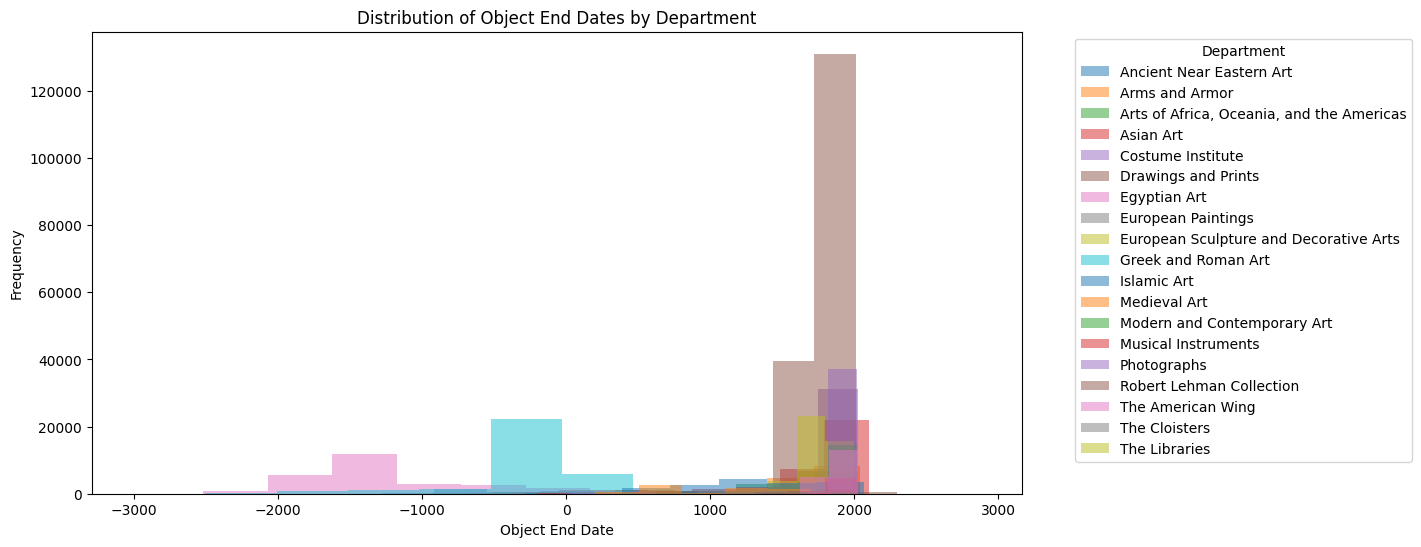

In [24]:
# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Group by 'Department' and plot the distribution of 'Object End Date'
cleaned_data_no_anomalies.groupby('Department')['Object End Date'].plot(kind='hist', alpha=0.5, legend=True)

# Add a title to the plot
plt.title('Distribution of Object End Dates by Department')

# Label the X-axis
plt.xlabel('Object End Date')

# Label the Y-axis
plt.ylabel('Frequency')

# Add a legend with the title 'Department' and position it outside the plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

#### Scatter Plot for Object Begin Date vs Accession Year by Department

This script creates a scatter plot to visualize the relationship between object begin dates and accession years, grouped by department. The following steps outline the process:

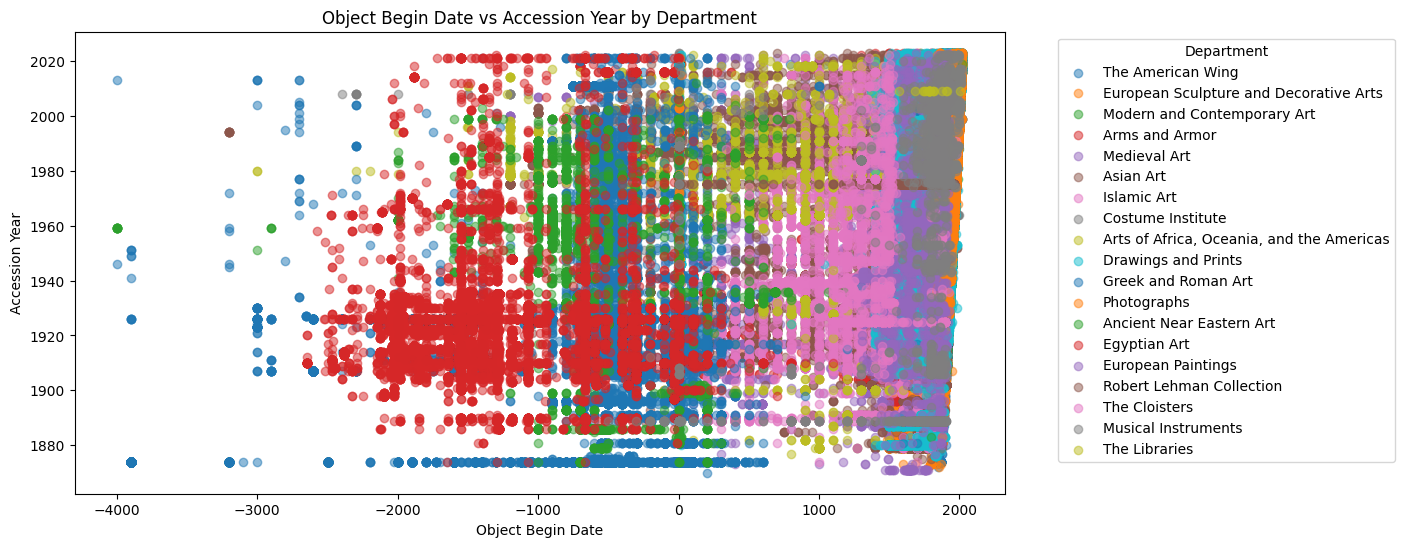

In [25]:
# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Loop through each unique department and create a scatter plot
for department in cleaned_data_no_anomalies['Department'].unique():
    # Filter the data for the current department
    dept_data = cleaned_data_no_anomalies[cleaned_data_no_anomalies['Department'] == department]
    # Create a scatter plot for the current department
    plt.scatter(dept_data['Object Begin Date'], dept_data['AccessionYear'], label=department, alpha=0.5)

# Add a title to the plot
plt.title('Object Begin Date vs Accession Year by Department')

# Label the X-axis
plt.xlabel('Object Begin Date')

# Label the Y-axis
plt.ylabel('Accession Year')

# Add a legend with the title 'Department' and position it outside the plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

#### Data Visualization of Object Dates by Department

This script generates two plots:
1. A scatter plot showing the mean of object begin dates by department.
2. A boxplot showing the distribution of object begin dates by department.

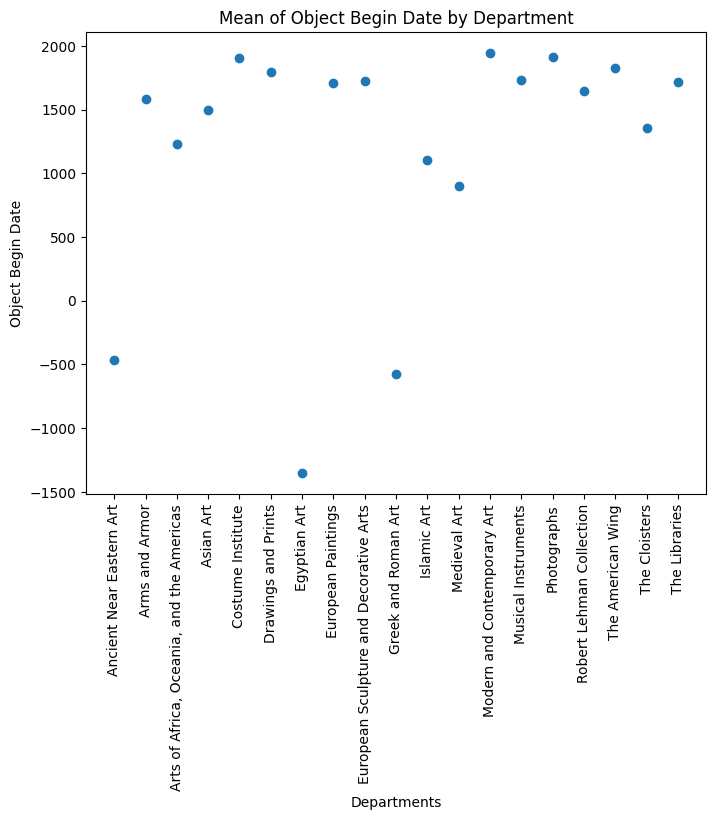

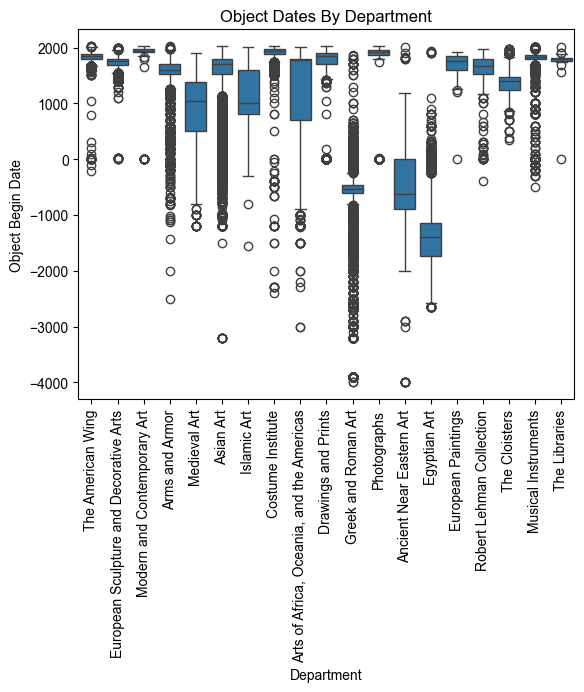

In [26]:
# Calculate the mean Object Begin Date for each department
obj_begin_means = cleaned_data_no_anomalies.groupby('Department')['Object Begin Date'].mean()

# Create a figure with specified size
plt.figure(figsize=(8, 6))  # Adjust figure size if needed

# Generate a scatter plot of the mean accession years by department
plt.scatter(obj_begin_means.index, obj_begin_means.values)

# Add title and labels to the plot
plt.title('Mean of Object Begin Date by Department')
plt.xlabel('Departments')
plt.ylabel('Object Begin Date')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

# Boxplot of Object Dates by Department
# Generate a boxplot of object begin dates by department using the default palette
sns.boxplot(x=cleaned_data_no_anomalies['Department'], y=cleaned_data_no_anomalies['Object Begin Date'])

# Set the theme for the plot with specified figure size
sns.set_theme(rc={'figure.figsize': (20, 10)})

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add title to the plot
plt.title("Object Dates By Department")

# Display the plot
plt.show()

#### Data Visualization of Accession Dates by Department

This script generates two plots:
1. A scatter plot showing the mean of accession years by department.
2. A boxplot showing the distribution of accession years by department.

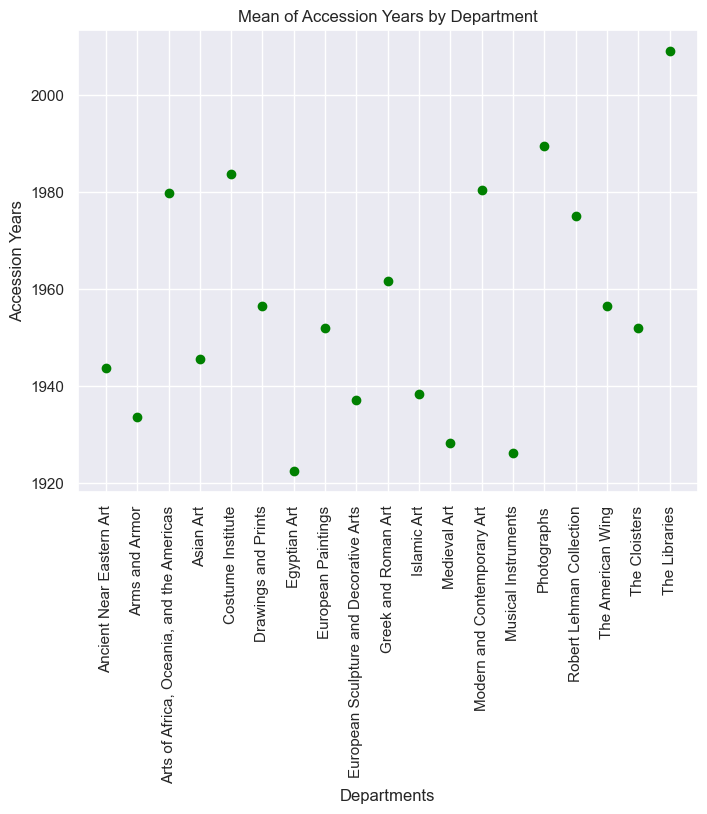

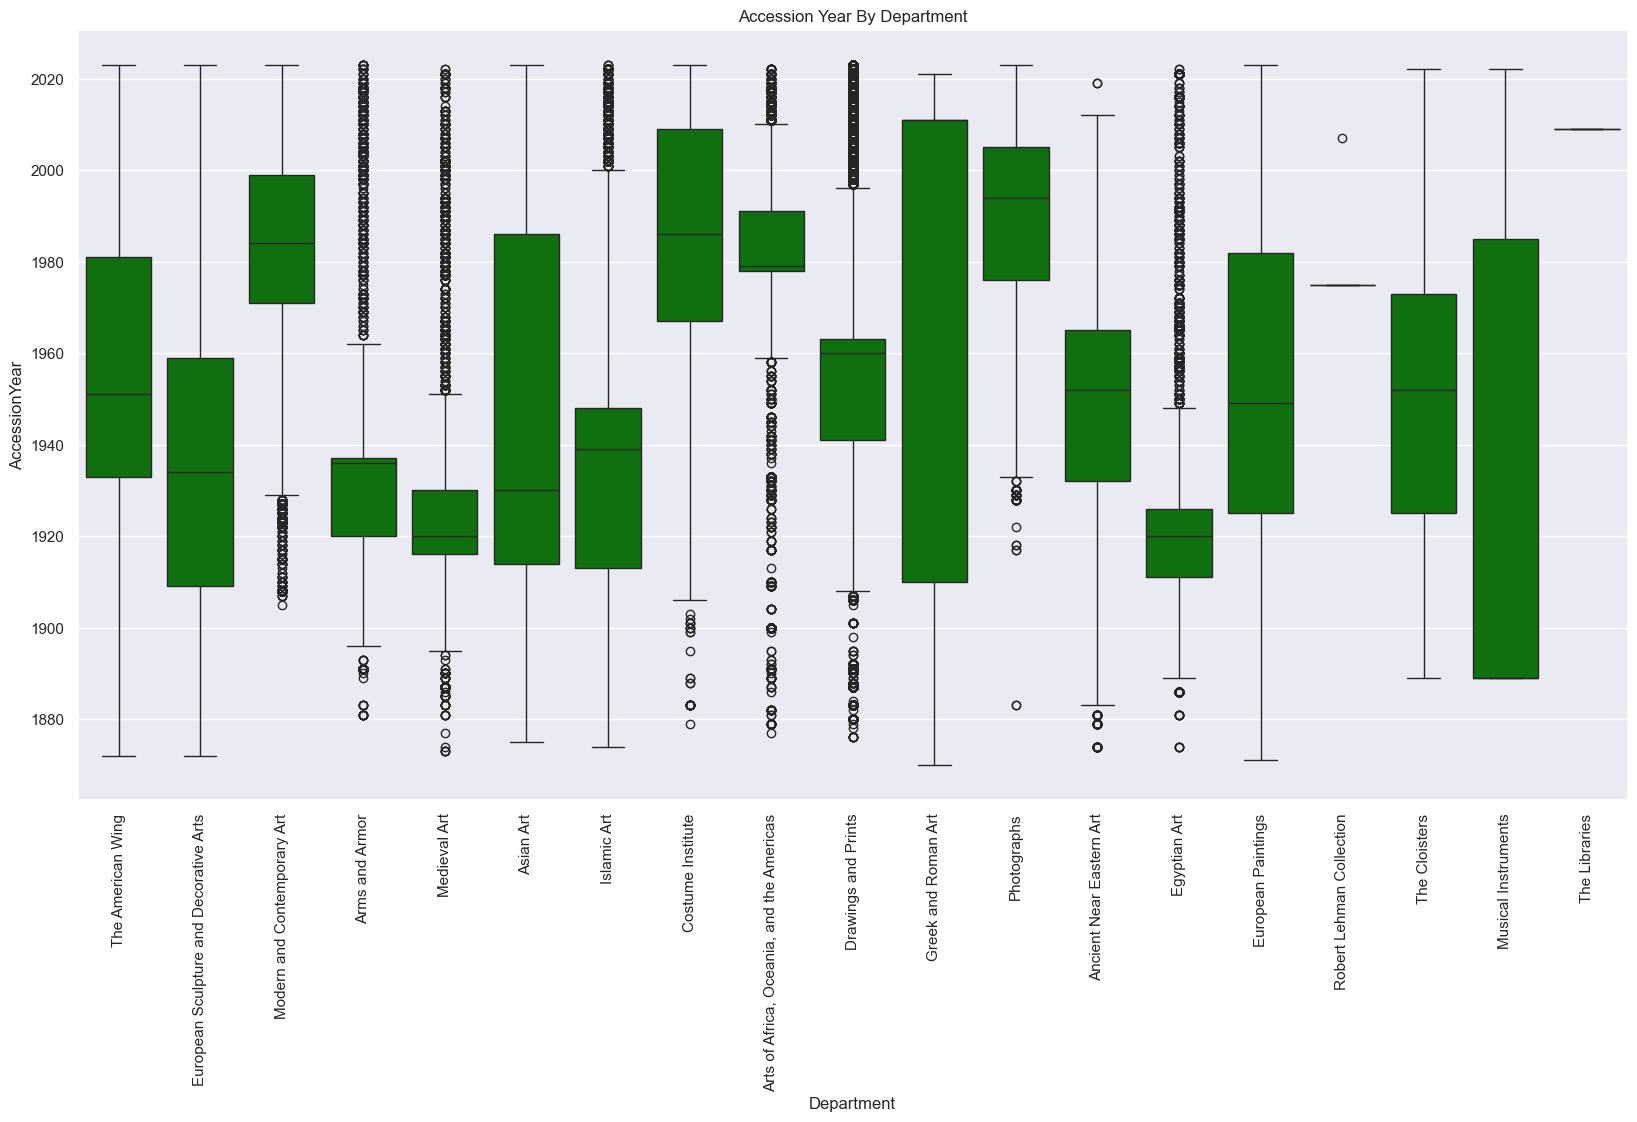

In [27]:
# Calculate the mean accession year for each department
acces_means = cleaned_data_no_anomalies.groupby('Department')['AccessionYear'].mean()

# Create a figure with specified size
plt.figure(figsize=(8, 6))  # Adjust figure size if needed

# Generate a scatter plot of the mean accession years by department
plt.scatter(acces_means.index, acces_means.values, color='green')

# Add title and labels to the plot
plt.title('Mean of Accession Years by Department')
plt.xlabel('Departments')
plt.ylabel('Accession Years')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

# Boxplot of Accession Date By Department
# Generate a boxplot of accession years by department using a green color palette
sns.boxplot(x=cleaned_data_no_anomalies['Department'], y=cleaned_data_no_anomalies['AccessionYear'], color='green')

# Set the theme for the plot with specified figure size
sns.set_theme(rc={'figure.figsize': (20, 10)})

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add title to the plot
plt.title("Accession Year By Department")

# Display the plot
plt.show()

#### Most Represented Department by Year

This script identifies the most represented department for each year based on the 'Object Begin Date' and prints the results.

In [28]:
# Group the data by 'Object Begin Date' and find the most common department for each year
mcv_osd = cleaned_data_no_anomalies.groupby('Object Begin Date')['Department'].agg(lambda x: x.value_counts().index[0]).rename('Most Common Value')

# Print the most common department for each year
print(mcv_osd)

Object Begin Date
-4000    Ancient Near Eastern Art
-3999         Greek and Roman Art
-3900         Greek and Roman Art
-3200         Greek and Roman Art
-3100         Greek and Roman Art
                   ...           
 2018           Costume Institute
 2019         Drawings and Prints
 2020         Drawings and Prints
 2021           Costume Institute
 2022           Costume Institute
Name: Most Common Value, Length: 1938, dtype: object


#### Most Represented Department by Accession Year

This script identifies the most represented department for each accession year based on the 'AccessionYear' and prints the results.

In [29]:
# Group the data by 'AccessionYear' and find the most common department for each year
mcv_acc = cleaned_data_no_anomalies.groupby('AccessionYear')['Department'].agg(lambda x: x.value_counts().index[0]).rename('Most Common Value')

# Print the most common department for each accession year
print(mcv_acc)


AccessionYear
1870.0                       Greek and Roman Art
1871.0                        European Paintings
1872.0    European Sculpture and Decorative Arts
1873.0    European Sculpture and Decorative Arts
1874.0                       Greek and Roman Art
                           ...                  
2019.0                       Drawings and Prints
2020.0                               Photographs
2021.0                               Photographs
2022.0                       Drawings and Prints
2023.0                       Drawings and Prints
Name: Most Common Value, Length: 154, dtype: object


# Modeling Imports

This script imports the necessary libraries and modules for building and evaluating machine learning models, specifically decision trees and random forests.

In [30]:
# Import metrics for evaluating model performance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Import module for splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# Import decision tree classifier and plotting functions
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Import random forest classifier
from sklearn.ensemble import RandomForestClassifier

# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Import additional metrics and utilities
from sklearn import metrics
from sklearn.utils.multiclass import unique_labels
from sklearn import tree

# Import numpy for numerical operations
import numpy as np

#### Data Splitting for Model Training and Testing

This script splits the dataset into training and testing sets for both old and cleaned data. The target variable is 'Department', and some irrelevant columns are dropped before splitting.

In [31]:
# Splits With Old Data
# Drop irrelevant columns from the old dataset
X_old = cleaned_data_no_one.drop(['Department', 'Dimensions', 'Artist Begin Date', 'Artist End Date'], axis=1)

# Sort the old dataset by 'Department'
cleaned_data_no_one = cleaned_data_no_one.sort_values(by='Department')

# Set the target variable for the old dataset
y_old = cleaned_data_no_one.Department

# Split the old dataset into training and testing sets (70% train, 30% test)
X_train_old, X_test_old, y_train_old, y_test_old = train_test_split(X_old, y_old, test_size=0.3, random_state=1)

# Splits With Cleaned Data
# Drop irrelevant columns from the cleaned dataset
X = cleaned_data_no_anomalies.drop(['Department', 'Dimensions', 'Artist Begin Date', 'Artist End Date'], axis=1)

# Sort the cleaned dataset by 'Department'
cleaned_data_no_anomalies = cleaned_data_no_anomalies.sort_values(by='Department')

# Set the target variable for the cleaned dataset
y = cleaned_data_no_anomalies.Department

# Split the cleaned dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#### Decision Tree Classifier on Old and New Data

This script trains and predicts using a Decision Tree Classifier on both old and cleaned datasets.

In [32]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the classifier on the old training data
clf = clf.fit(X_train_old, y_train_old)

# Predict the target variable for the old test data
y_pred_old = clf.predict(X_test_old)

# Decision Tree on New Data
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the classifier on the cleaned training data
clf = clf.fit(X_train, y_train)

# Predict the target variable for the cleaned test data
y_pred = clf.predict(X_test)


#### Decision Tree Accuracy Evaluation

This script evaluates the accuracy of the Decision Tree Classifier on both old and cleaned datasets and prints the results.

In [33]:
# Calculate and print the accuracy of the Decision Tree Classifier on the old test data
print("Old Data Accuracy:", metrics.accuracy_score(y_test_old, y_pred_old))

# Calculate and print the accuracy of the Decision Tree Classifier on the cleaned test data
print("Cleaned Accuracy:", metrics.accuracy_score(y_test, y_pred))

Old Data Accuracy: 0.7671376206545314
Cleaned Accuracy: 0.7710774065915564


#### Plotting Confusion Matrix for Decision Tree Model

This script generates a confusion matrix for the Decision Tree model's predictions and visualizes it using a heatmap.

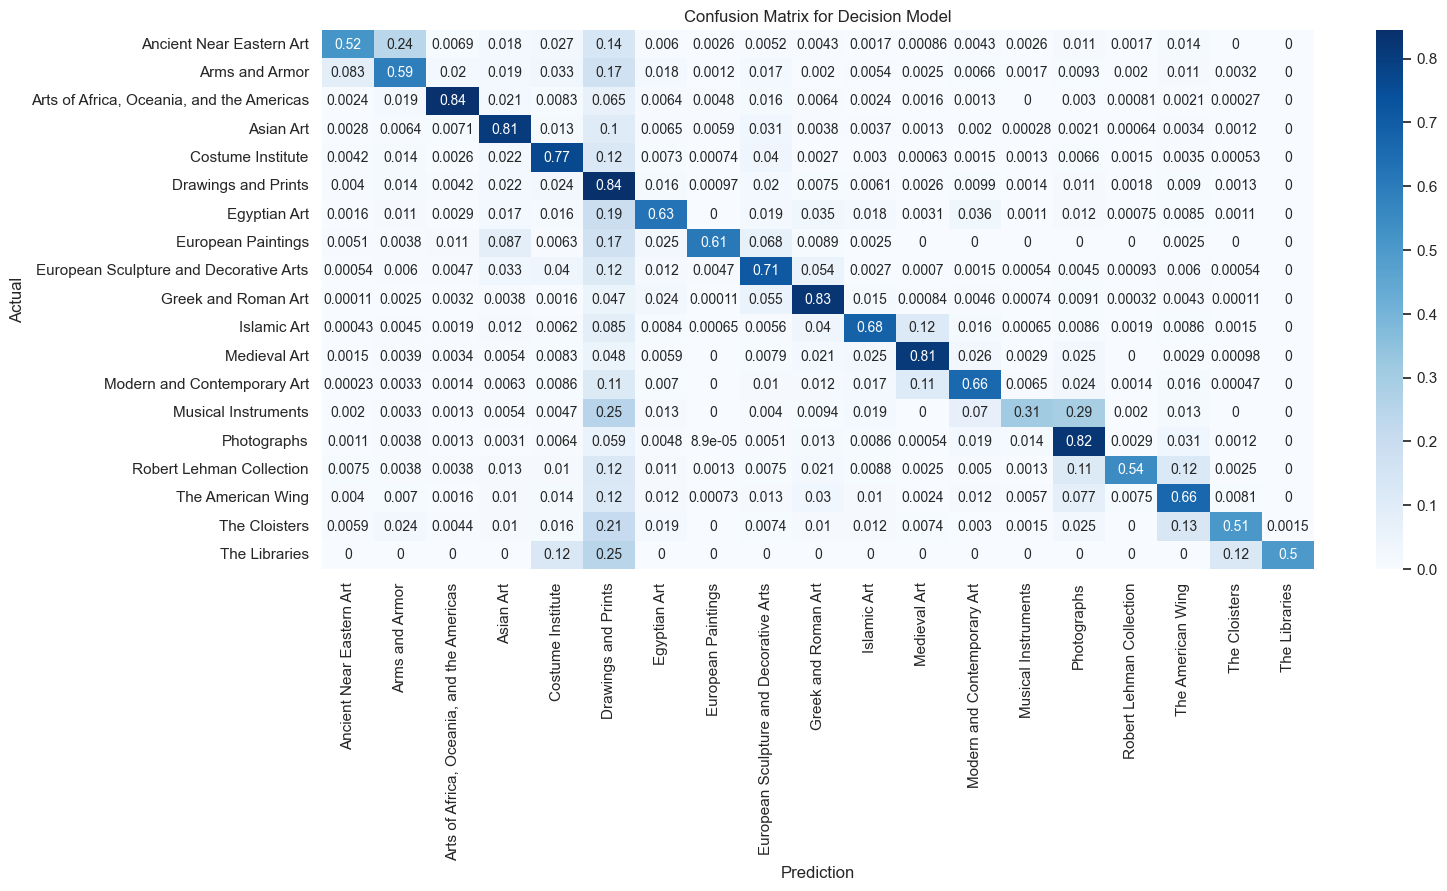

In [34]:
# Get the unique labels from the test and predicted data
labels = unique_labels(y_test, y_pred)

# Compute the confusion matrix
matrix = confusion_matrix(y_test, y_pred, labels=labels)

# Normalize the confusion matrix, adding a small value to avoid division by zero
epsilon = 1e-10
matrix = matrix.astype('float') / (matrix.sum(axis=1)[:, np.newaxis] + epsilon)

# Create a figure with specified size
plt.figure(figsize=(16, 7))

# Generate a heatmap for the confusion matrix
sns.heatmap(matrix, annot=True, annot_kws={'size': 10}, cmap=plt.cm.Blues)

# Set tick marks for x and y axes
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks + 0.5, labels, rotation=90)
plt.yticks(tick_marks+ 0.5, labels, rotation=0)

# Add labels and title to the plot
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Model')

# Display the plot
plt.show()

#### Classification Report for Decision Tree Model

This script generates and prints a classification report for the Decision Tree model's predictions, providing detailed metrics on the model's performance.

In [35]:
# Generate the classification report for the Decision Tree model's predictions
class_report = classification_report(y_test, y_pred, zero_division=0)

# Print the classification report
print(f"Classification Report:\n{class_report}")

Classification Report:
                                           precision    recall  f1-score   support

                 Ancient Near Eastern Art       0.46      0.52      0.49      1165
                           Arms and Armor       0.60      0.59      0.60      4071
Arts of Africa, Oceania, and the Americas       0.84      0.84      0.84      3724
                                Asian Art       0.79      0.81      0.80     10888
                        Costume Institute       0.74      0.77      0.76      9481
                      Drawings and Prints       0.81      0.84      0.83     51416
                             Egyptian Art       0.75      0.63      0.68      7966
                       European Paintings       0.69      0.61      0.65       790
   European Sculpture and Decorative Arts       0.76      0.71      0.74     12921
                      Greek and Roman Art       0.79      0.83      0.81      9522
                              Islamic Art       0.75      0.68 

# Random Forest Classifier on Old and New Data

This script trains and predicts using a Random Forest Classifier on both old and cleaned datasets.

In [36]:
# Random Forest on Old Data
# Initialize the Random Forest Classifier
rf = RandomForestClassifier()

# Train the classifier on the old training data
rf = rf.fit(X_train_old, y_train_old)

# Predict the target variable for the old test data
y_pred_old = rf.predict(X_test_old)

# Random Forest on New Data
# Initialize the Random Forest Classifier
rf = RandomForestClassifier()

# Train the classifier on the cleaned training data
rf = rf.fit(X_train, y_train)

# Predict the target variable for the cleaned test data
y_pred = rf.predict(X_test)

#### Random Forest Accuracy Evaluation

This script evaluates the accuracy of the Random Forest Classifier on both old and cleaned datasets and prints the results.

In [37]:
# Calculate and print the accuracy of the Random Forest Classifier on the old test data
print("Old Data Accuracy:", metrics.accuracy_score(y_test_old, y_pred_old))

# Calculate and print the accuracy of the Random Forest Classifier on the cleaned test data
print("Cleaned Accuracy:", metrics.accuracy_score(y_test, y_pred))

Old Data Accuracy: 0.7799358356950324
Cleaned Accuracy: 0.7838592454365608


#### Plotting Confusion Matrix for Random Forest Model

This script generates a confusion matrix for the Random Forest model's predictions and visualizes it using a heatmap.

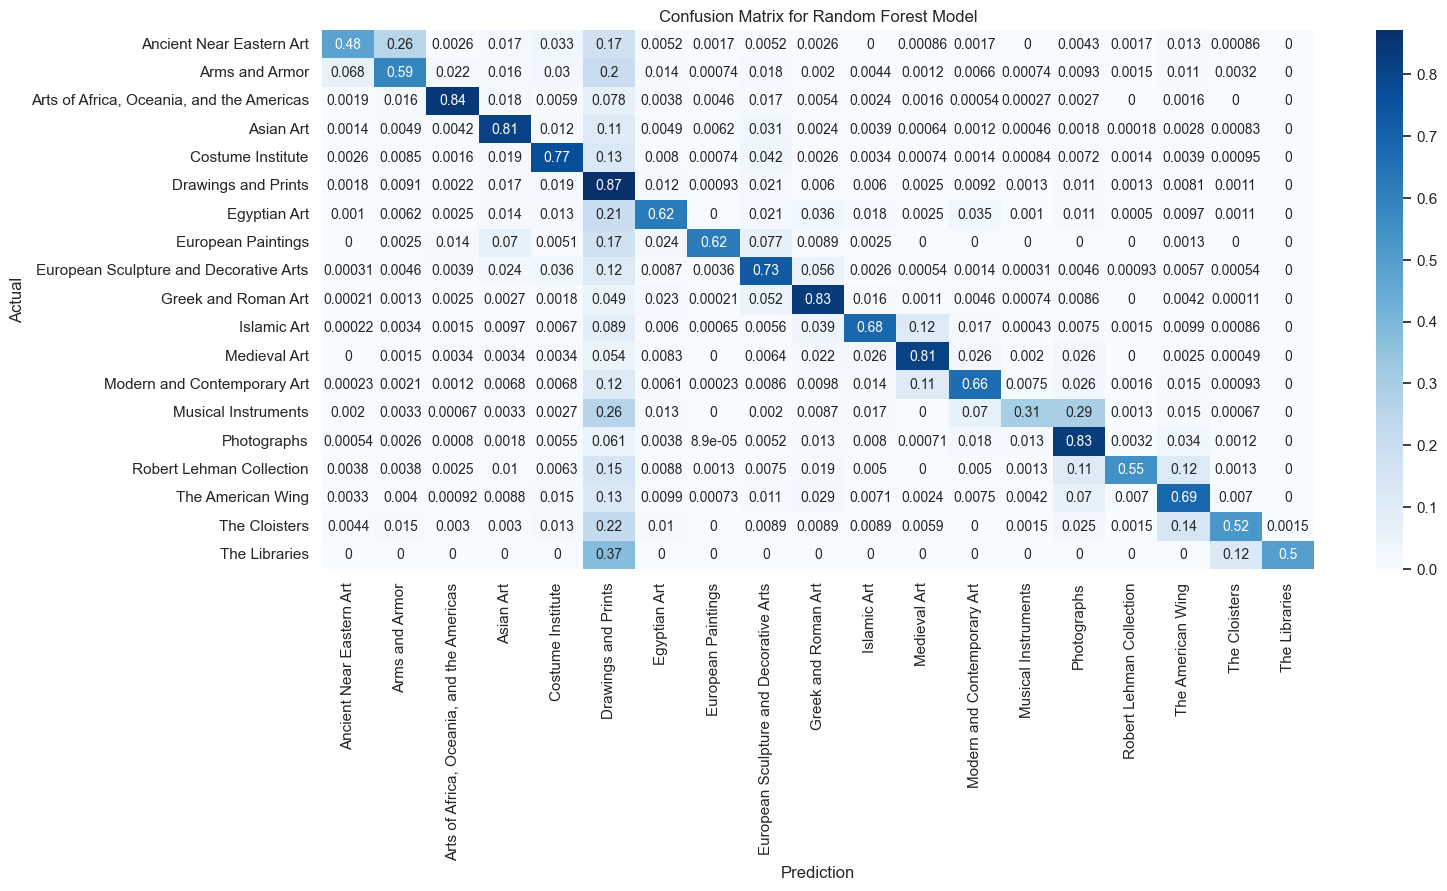

In [38]:
# Get the unique labels from the test and predicted data
labels = unique_labels(y_test, y_pred)

# Compute the confusion matrix
matrix = confusion_matrix(y_test, y_pred, labels=labels)

# Normalize the confusion matrix, adding a small value to avoid division by zero
epsilon = 1e-10
matrix = matrix.astype('float') / (matrix.sum(axis=1)[:, np.newaxis] + epsilon)

# Create a figure with specified size
plt.figure(figsize=(16, 7))

# Generate a heatmap for the confusion matrix
sns.heatmap(matrix, annot=True, annot_kws={'size': 10}, cmap=plt.cm.Blues)

# Set tick marks for x and y axes
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks + 0.5, labels, rotation=90)  # Shift x-axis labels to the right
plt.yticks(tick_marks + 0.5, labels, rotation=0)  # Shift y-axis labels down

# Add labels and title to the plot
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Model')

# Display the plot
plt.show()

#### Classification Report for Random Forest Model

This script generates and prints a classification report for the Random Forest model's predictions, providing detailed metrics on the model's performance.

In [39]:
# Generate the classification report for the Random Forest model's predictions
class_report = classification_report(y_test, y_pred, zero_division=0)

# Print the classification report
print(f"Classification Report:\n{class_report}")

Classification Report:
                                           precision    recall  f1-score   support

                 Ancient Near Eastern Art       0.55      0.48      0.51      1165
                           Arms and Armor       0.67      0.59      0.63      4071
Arts of Africa, Oceania, and the Americas       0.88      0.84      0.86      3724
                                Asian Art       0.83      0.81      0.82     10888
                        Costume Institute       0.78      0.77      0.77      9481
                      Drawings and Prints       0.81      0.87      0.84     51416
                             Egyptian Art       0.78      0.62      0.69      7966
                       European Paintings       0.71      0.62      0.66       790
   European Sculpture and Decorative Arts       0.77      0.73      0.75     12921
                      Greek and Roman Art       0.80      0.83      0.81      9522
                              Islamic Art       0.76      0.68 